In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

In [3]:
df = pd.read_csv("ID3__CART__Naive_Bayes_car_evaluation.csv")
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.shape

(1727, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df.isna().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [8]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [9]:
df.duplicated().sum()

np.int64(0)

In [51]:
df["unacc"].value_counts()

unacc
2    1209
0     384
1      69
3      65
Name: count, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder

In [31]:
label_encoders = {}
for col in df.select_dtypes(include = ["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    


In [32]:
X = df.drop("unacc", axis = 1)
y = df["unacc"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

In [34]:
X_train.shape

(1381, 6)

In [36]:
X_train.head()

,vhigh,vhigh.1,2,2.1,small,low
107,3,0,0,0,2,1
900,2,3,1,1,2,2
1708,1,1,3,0,0,0
705,0,2,2,0,1,2
678,0,2,1,0,1,2


In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1381 entries, 107 to 1126
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   vhigh    1381 non-null   int64
 1   vhigh.1  1381 non-null   int64
 2   2        1381 non-null   int64
 3   2.1      1381 non-null   int64
 4   small    1381 non-null   int64
 5   low      1381 non-null   int64
dtypes: int64(6)
memory usage: 75.5 KB


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [38]:
id3_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 42)

In [39]:
id3_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [40]:
y_pred = id3_tree.predict(X_test)

In [42]:
import seaborn as sns

In [49]:
def model_eval(y_test, y_pred):
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision :", precision_score(y_test, y_pred, average="macro"))
    print("Recall :", recall_score(y_test, y_pred, average="macro"))
    print("f1-score :", f1_score(y_test, y_pred, average="macro"))
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, fmt = 'd', annot = True)

Accuracy : 0.9739884393063584
Precision : 0.8891666666666668
Recall : 0.9076012223071047
f1-score : 0.8979656803298569


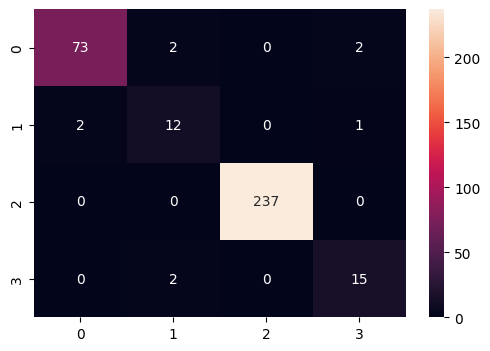

In [50]:
model_eval(y_test, y_pred)

In [52]:
#lets now classify using CART - 
cart_tree = DecisionTreeClassifier(criterion = "gini", random_state = 42)
cart_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
y_pred = cart_tree.predict(X_test)

Accuracy : 0.9710982658959537
Precision : 0.8859649122807017
Recall : 0.9065463699864296
f1-score : 0.8958676516595409


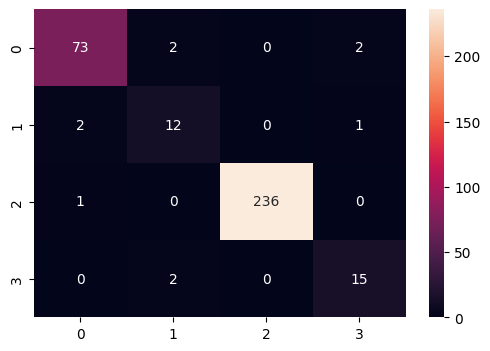

In [54]:
model_eval(y_test, y_pred)

In [56]:
#classifying using naive bayes - 
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [57]:
y_pred = nb.predict(X_test)

Accuracy : 0.6127167630057804
Precision : 0.37306618819776716
Recall : 0.4644638062359582
f1-score : 0.29583488970899513


d:\data analytics\data_mining_exercise\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


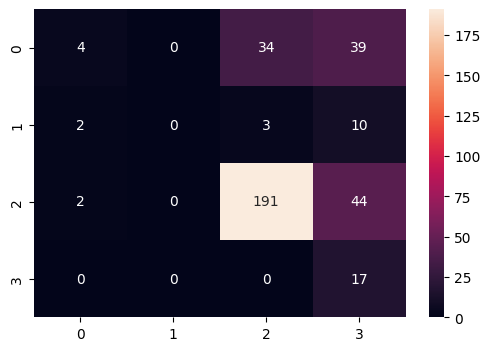

In [58]:
model_eval(y_test, y_pred)